# Esse trabalho tem a proposta de correlacionar dados do ENEM 2021

Visando entender  o perfil social dos participantes, analisei os dados de raça/cor, escolaridade da mãe, diferença das notas entre os sexos, faixa salarial e disponibilidade de internet em casa.

In [1]:
import pandas as pd


In [289]:
df = pd.read_excel(r"C:\Users\mayra\Downloads\dadosEnem\microdados_enem_2021\DADOS\enem21.xlsx")

In [290]:
df.head()

,NU_ANO,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,CO_UF_PROVA,SG_UF_PROVA,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,2021,F,1,1,1,31,MG,NaN,881.0,892.0,...,A,A,A,B,A,A,B,A,B,B
1,2021,M,1,1,1,27,AL,912.0,882.0,891.0,...,A,A,A,B,A,A,C,A,A,A
2,2021,F,3,1,1,35,SP,NaN,NaN,NaN,...,B,A,A,B,A,A,C,B,B,B
3,2021,M,1,3,2,23,CE,911.0,880.0,890.0,...,A,A,A,B,A,A,B,A,B,B
4,2021,F,1,3,2,23,CE,912.0,882.0,891.0,...,B,A,A,B,A,B,E,A,B,B


In [291]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [292]:
df.shape

(1048575, 48)

In [293]:
df.columns

Index(['NU_ANO', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object')

In [294]:
enem = df[['TP_SEXO','TP_COR_RACA','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_REDACAO','Q025',
         'Q006','Q002']]
print('Meu Dataset tem',enem.shape[1],'colunas e',enem.shape[0],'linhas')

Meu Dataset tem 9 colunas e 1048575 linhas


In [295]:
enem.head()

,TP_SEXO,TP_COR_RACA,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO,Q025,Q006,Q002
0,F,1,NaN,NaN,574.6,760.0,B,D,F
1,M,1,461.5,505.9,551.8,560.0,A,B,B
2,F,1,NaN,NaN,NaN,NaN,B,C,C
3,M,3,659.5,580.7,678.9,780.0,B,B,B
4,F,3,582.6,497.7,532.4,780.0,B,C,E


In [296]:
pd.DataFrame({'tipos':enem.dtypes, 'missing':enem.isna().sum()})

,tipos,missing
TP_SEXO,object,0
TP_COR_RACA,int64,0
NU_NOTA_MT,float64,267317
NU_NOTA_CN,float64,267317
NU_NOTA_CH,float64,229274
NU_NOTA_REDACAO,float64,229274
Q025,object,1
Q006,object,1
Q002,object,1


In [298]:
enem ['TP_COR_RACA'] = enem['TP_COR_RACA'].map({0:'NA', 6:'NA', 1:'Branca', 2:'Preta', 3:'Parda',
                                               4:'Amarela', 5:'Indígena'})

In [299]:
enem ['Q025'] = enem['Q025'].map({'A':'Não', 'B':'Sim'})

In [300]:
enem ['Q002'] = enem['Q002'].map({'A':'Nunca estudou', 'B':'Não completou EF', 'C':'Não completou EF',
                                'D':'Não completou EM', 'E':'Não completou ES', 'F':'Graduada',
                                'G':'Pós-graduada','H':'Não sabe'})

In [301]:
enem ['Q006'] = enem['Q006'].map({'A':'Nenhuma renda', 'B':'Até 1.320', 'C':'Até 1.320',
                                 'D':'Até 3.520', 'E':'Até 3.520', 'F':'Até 3.520', 'G':'Até 3.520',
                                 'H':'Até 10.560','I':'Até 10.560', 'J':'Até 10.560','K':'Até 10.560',
                                 'L':'Até 10.560','M':'Até 10.560','N':'Até 10.560',
                                 'O':'Mais de 10.560','P':'Mais de 10.560','Q':'Mais de 10.560'})

Distribuição de pessoas considerando sexo feminino e masculino:

In [302]:
enem['TP_SEXO'].value_counts()/enem.shape[0]*100

F    67.503452
M    32.496452
Name: TP_SEXO, dtype: float64

Distribuição de pessoas considerando autodenominação de raça:

In [303]:
enem['TP_COR_RACA'].value_counts()/enem.shape[0]*100

Parda       44.761658
Branca      38.285923
Preta       12.197304
NA           2.147865
Amarela      2.092171
Indígena     0.514984
Name: TP_COR_RACA, dtype: float64

In [304]:
plt.rcParams['figure.figsize'] = (10,7)

Relação de sexo x raça

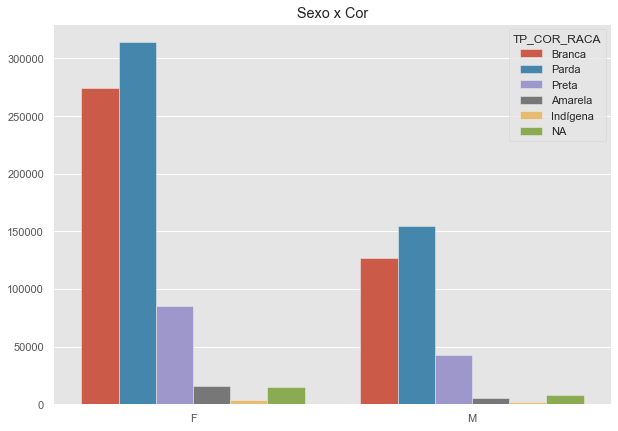

In [305]:
sns.countplot(enem['TP_SEXO'],hue=enem['TP_COR_RACA'], dodge=True)
plt.title('Sexo x Cor')
plt.xlabel('')
plt.ylabel("")
plt.show()

TEM INTERNET EM CASA?

In [306]:
enem['Q025'].value_counts()/enem.shape[0]*100

Sim    89.065361
Não    10.934448
Name: Q025, dtype: float64

Escolaridade da mãe:

In [307]:
enem['Q002'].value_counts()/enem.shape[0]*100

Não completou ES    35.468674
Não completou EF    25.500965
Não completou EM    12.931061
Graduada            10.941982
Pós-graduada         9.659576
Não sabe             2.908516
Nunca estudou        2.589035
Name: Q002, dtype: float64

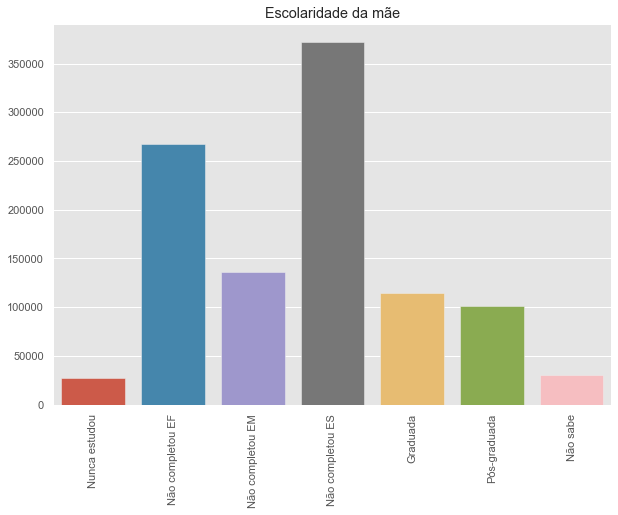

In [333]:
sns.countplot(enem['Q002'], order= ("Nunca estudou","Não completou EF","Não completou EM", "Não completou ES", "Graduada", "Pós-graduada", "Não sabe"))
plt.title('Escolaridade da mãe')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()

Renda Familiar

In [309]:
enem['Q006'].value_counts()/enem.shape[0]*100

Até 1.320         49.506378
Até 3.520         29.241753
Até 10.560        11.365700
Nenhuma renda      7.034302
Mais de 10.560     2.851677
Name: Q006, dtype: float64

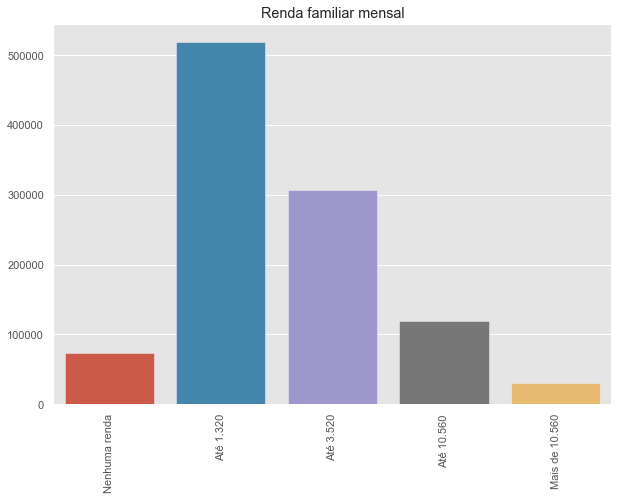

In [322]:
sns.countplot(enem['Q006'],order= ("Nenhuma renda","Até 1.320","Até 3.520", "Até 10.560", "Mais de 10.560"))
plt.title('Renda familiar mensal')
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("")
plt.show()


In [310]:
enem.describe()


,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_REDACAO
count,781258.000000,781258.000000,819301.000000,819301.000000
mean,530.919465,488.213114,518.687346,629.982119
std,109.845762,80.803783,94.870159,190.962895
min,0.000000,0.000000,0.000000,0.000000
25%,441.900000,427.600000,444.900000,520.000000
50%,508.700000,476.600000,519.100000,620.000000
75%,606.400000,540.300000,586.700000,760.000000
max,953.100000,867.100000,846.900000,1000.000000


Comparando nota de matemática entre os sexos autodeclarados:


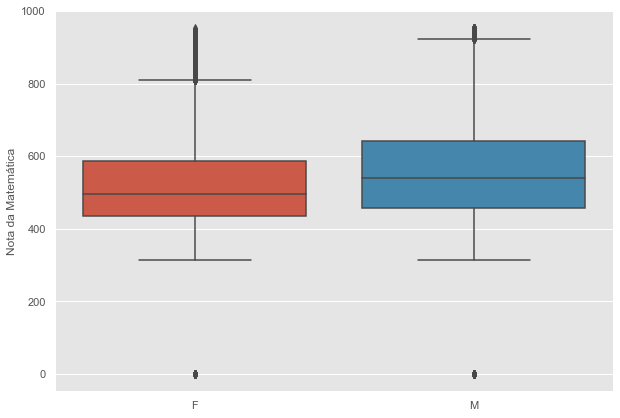

In [311]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota da Matemática")
plt.show()

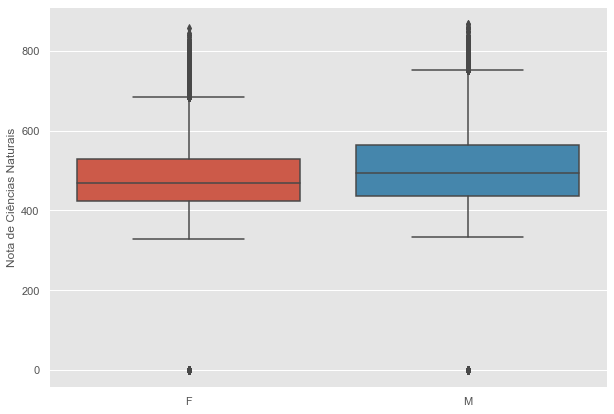

In [325]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_CN'])
plt.xlabel("")
plt.ylabel("Nota de Ciências Naturais")
plt.show()

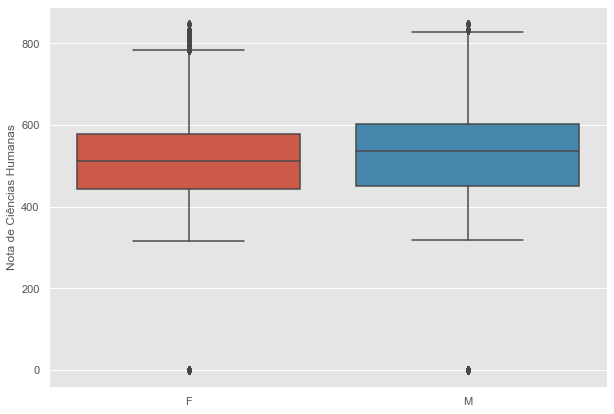

In [324]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_CH'])
plt.xlabel("")
plt.ylabel("Nota de Ciências Humanas")
plt.show()


Comparando nota de redação entre os sexos autodeclarados

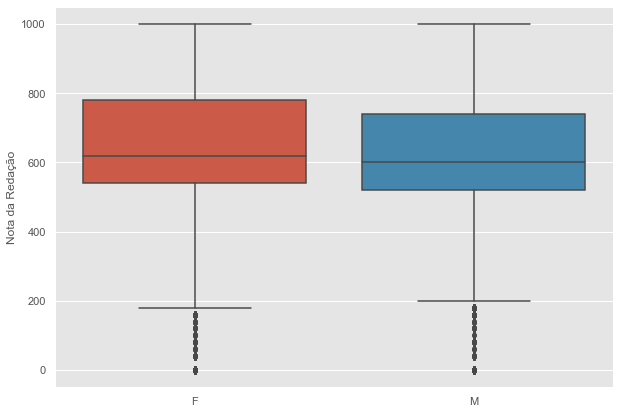

In [312]:
sns.boxplot(x=enem['TP_SEXO'], y=enem['NU_NOTA_REDACAO'])
plt.xlabel("")
plt.ylabel("Nota da Redação")
plt.show()


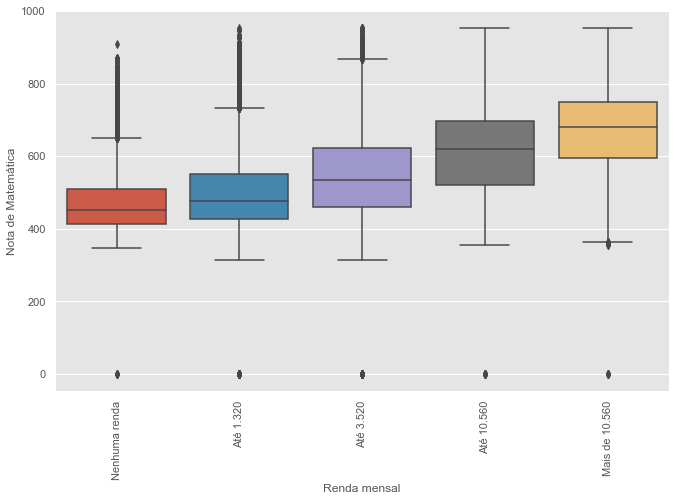

In [172]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_MT'],order= ("Nenhuma renda","Até 1.320","Até 3.520", "Até 10.560", "Mais de 10.560"))
plt.xlabel("Renda mensal")
plt.xticks(rotation=90)
plt.ylabel("Nota de Matemática")
plt.show()


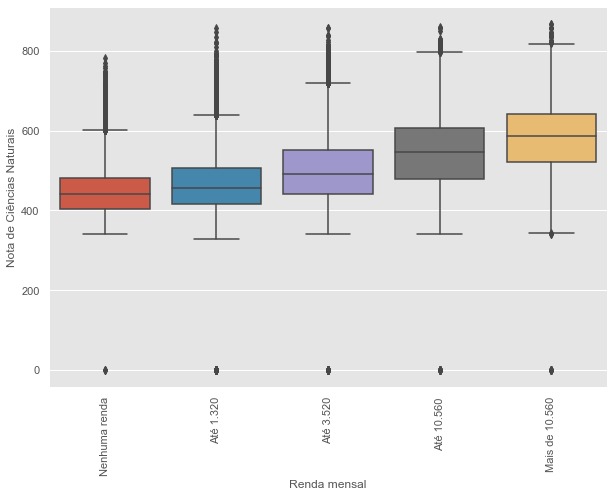

In [326]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_CN'],order= ("Nenhuma renda","Até 1.320","Até 3.520", "Até 10.560", "Mais de 10.560"))
plt.xlabel("Renda mensal")
plt.xticks(rotation=90)
plt.ylabel("Nota de Ciências Naturais")
plt.show()


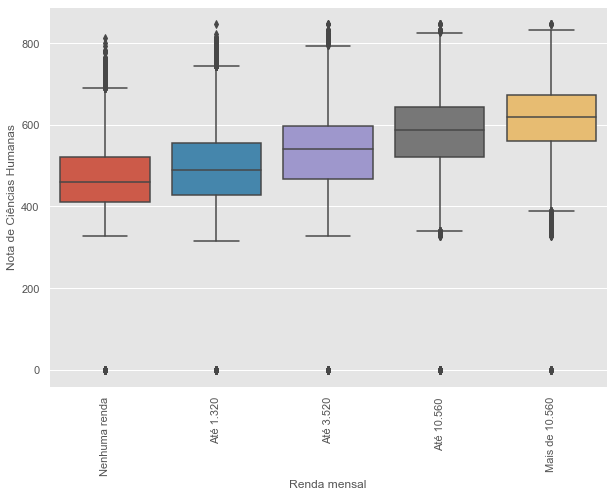

In [327]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_CH'],order= ("Nenhuma renda","Até 1.320","Até 3.520", "Até 10.560", "Mais de 10.560"))
plt.xlabel("Renda mensal")
plt.xticks(rotation=90)
plt.ylabel("Nota de Ciências Humanas")
plt.show()


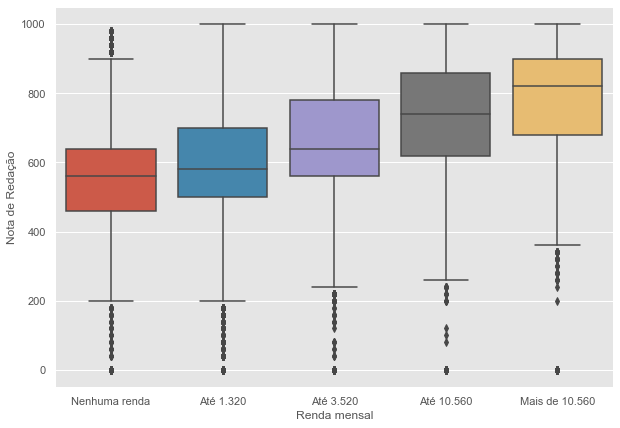

In [313]:
sns.boxplot(x=enem['Q006'], y=enem['NU_NOTA_REDACAO'],order= ("Nenhuma renda","Até 1.320","Até 3.520", "Até 10.560", "Mais de 10.560"))
plt.xlabel("Renda mensal")
plt.ylabel("Nota de Redação")
plt.show()


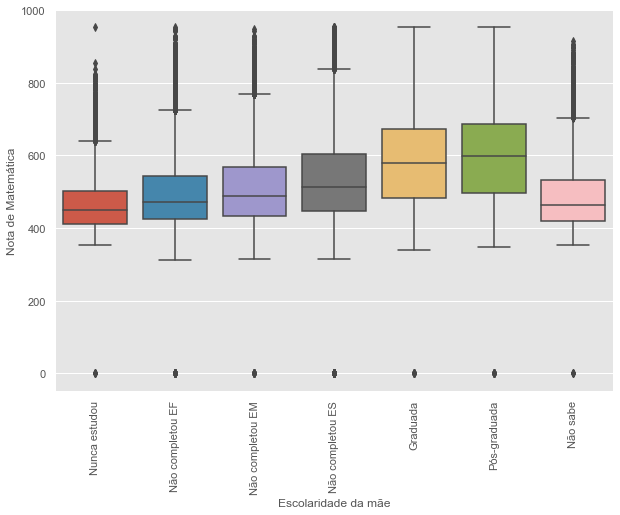

In [314]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_MT'], order= ("Nunca estudou","Não completou EF","Não completou EM", "Não completou ES", "Graduada", "Pós-graduada", "Não sabe"))
plt.xlabel("Escolaridade da mãe")
plt.xticks(rotation=90)
plt.ylabel("Nota de Matemática")
plt.show()


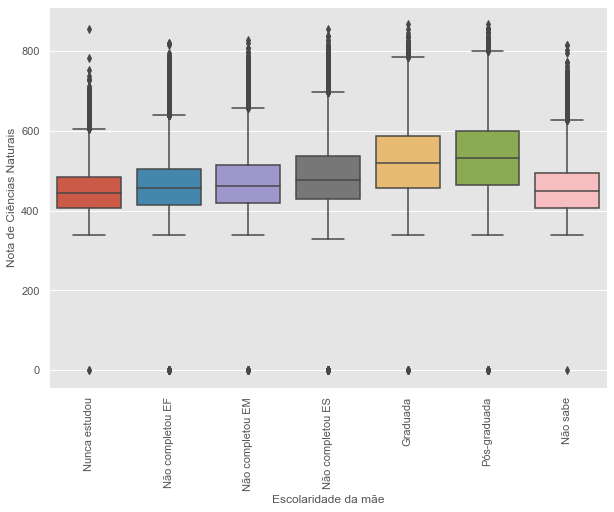

In [328]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_CN'], order= ("Nunca estudou","Não completou EF","Não completou EM", "Não completou ES", "Graduada", "Pós-graduada", "Não sabe"))
plt.xlabel("Escolaridade da mãe")
plt.xticks(rotation=90)
plt.ylabel("Nota de Ciências Naturais")
plt.show()


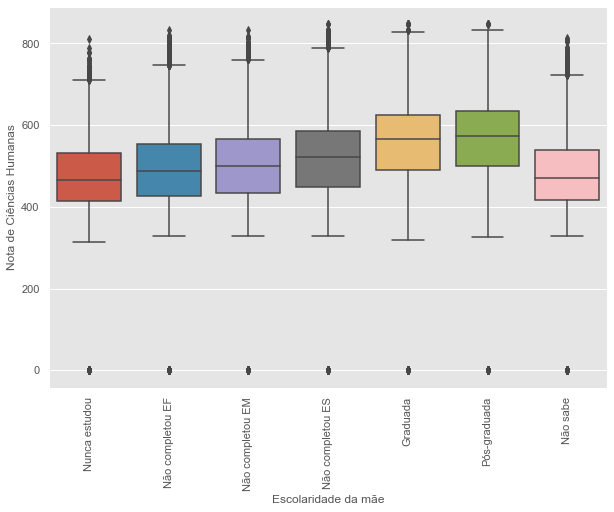

In [329]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_CH'], order= ("Nunca estudou","Não completou EF","Não completou EM", "Não completou ES", "Graduada", "Pós-graduada", "Não sabe"))
plt.xlabel("Escolaridade da mãe")
plt.xticks(rotation=90)
plt.ylabel("Nota de Ciências Humanas")
plt.show()


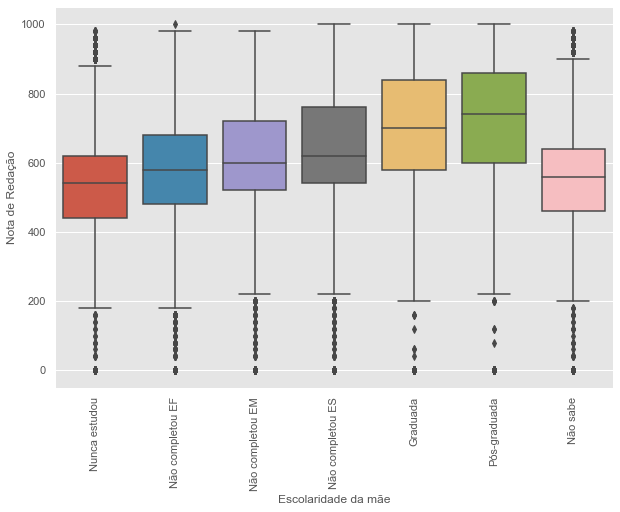

In [315]:
sns.boxplot(x=enem['Q002'], y=enem['NU_NOTA_REDACAO'], order= ("Nunca estudou","Não completou EF","Não completou EM", "Não completou ES", "Graduada", "Pós-graduada", "Não sabe"))
plt.xlabel("Escolaridade da mãe")
plt.xticks(rotation=90)
plt.ylabel("Nota de Redação")
plt.show()

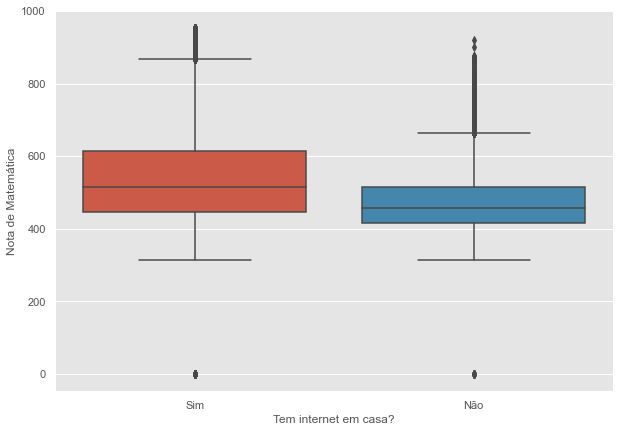

In [317]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_MT'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Matemática")
plt.show()

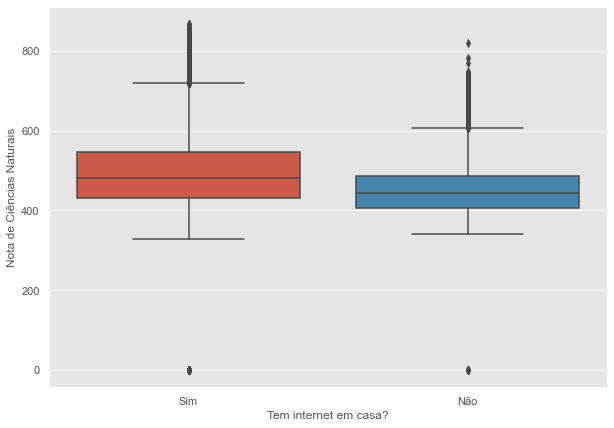

In [330]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_CN'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Ciências Naturais")
plt.show()

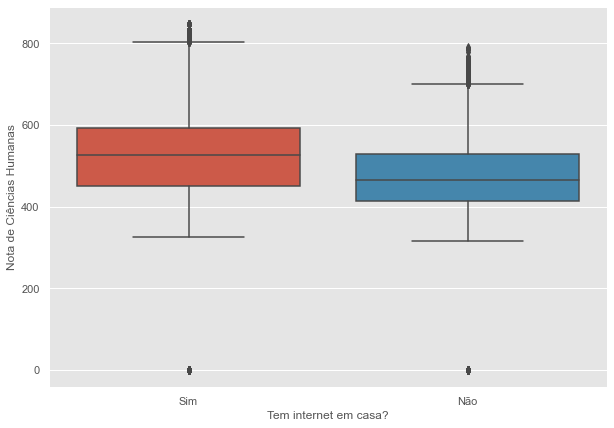

In [331]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_CH'])
plt.xlabel("Tem internet em casa?")
plt.ylabel("Nota de Ciências Humanas")
plt.show()

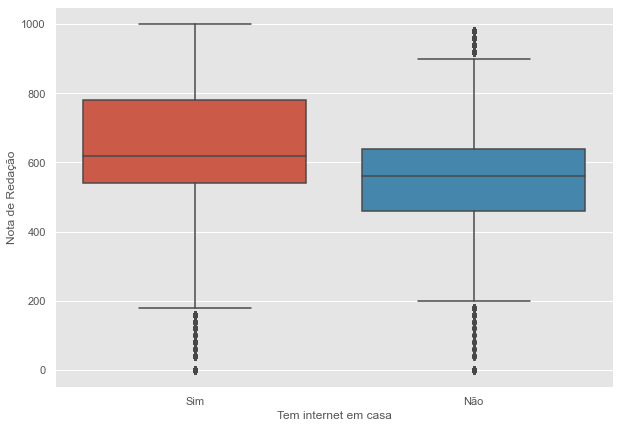

In [316]:
sns.boxplot(x=enem['Q025'], y=enem['NU_NOTA_REDACAO'])
plt.xlabel("Tem internet em casa")
plt.ylabel("Nota de Redação")
plt.show()


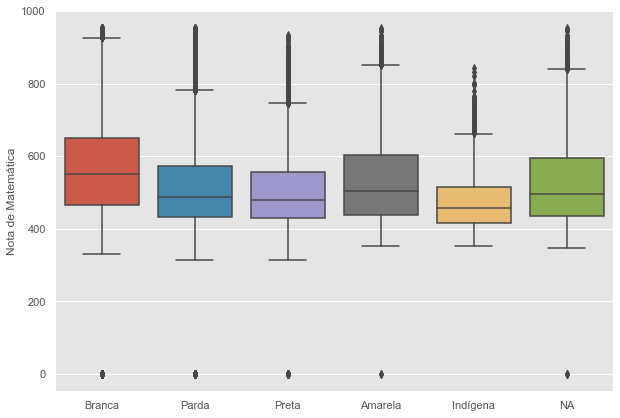

In [318]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_MT'])
plt.xlabel("")
plt.ylabel("Nota de Matemática")
plt.show()

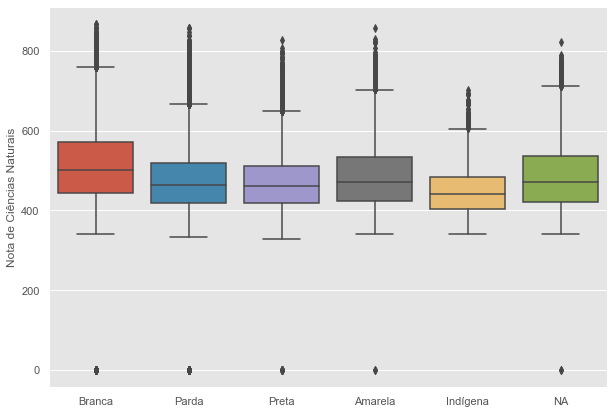

In [332]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_CN'])
plt.xlabel("")
plt.ylabel("Nota de Ciências Naturais")
plt.show()

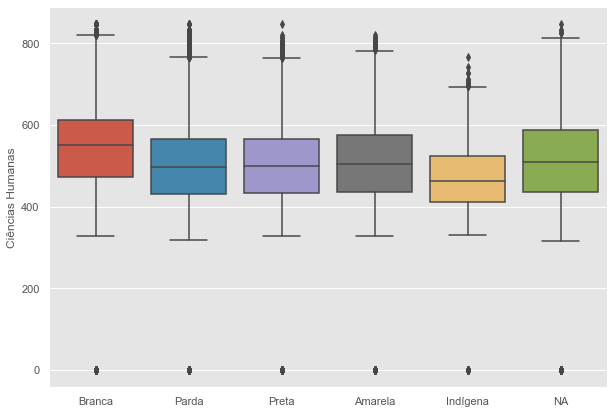

In [320]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_CH'])
plt.xlabel("")
plt.ylabel("Ciências Humanas")
plt.show()

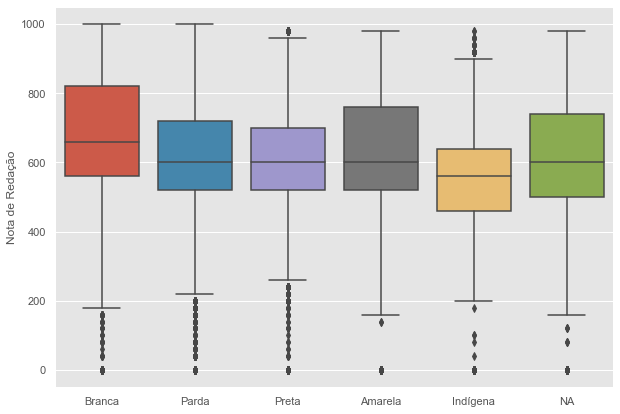

In [319]:
sns.boxplot(x=enem['TP_COR_RACA'], y=enem['NU_NOTA_REDACAO'])
plt.xlabel("")
plt.ylabel("Nota de Redação")
plt.show()